# Linear Least Squares

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#plt.rcParams['font.size'] = '10'

## Signal model
Consider the linear model $s[n] = \mathbf{H}\theta$ <br>
Find $\theta$ that minimizes
$$J(\theta) = (\mathbf{x}-\mathbf{H}\theta)^T (\mathbf{x}-\mathbf{H}\theta).$$

In [10]:
# Linear model
N = 10
Np = 2
theta = [2,1]
#Np = 3
#theta = [3,2,-0.2]
n = np.reshape(np.arange(N),(N,1))

H = n**0
for p in range(1,Np):
    H = np.hstack((H,n**p))

# Signal + noise
xn = H@theta + 2*np.random.randn(N)

N0 = 100
n0 = np.reshape(np.arange(N0)*N/N0,(N0,1))
H0 = n0**0
for p in range(1,Np):
    H0 = np.hstack((H0,n0**p))
sn0 = H0@theta

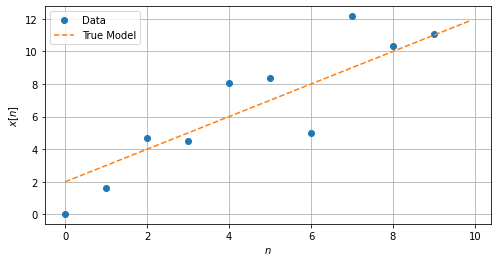

In [11]:
# Plotting data
plt.figure(figsize=[8,4])
plt.plot(n,xn,'o')
plt.plot(n0,sn0,'--')
plt.grid('on')
plt.xlabel('$n$')
plt.ylabel('$x[n]$')
plt.legend(['Data','True Model']);

In [12]:
# Calculating the estimator
theta_LS = np.linalg.inv(H.T@H)@H.T@xn
J_min = np.sum((xn-H@theta_LS)**2)
sn_LS = H0@theta_LS
print('Estimated Parameters:',theta_LS)
print('Min squared error:',J_min)


Estimated Parameters: [1.15283102 1.20774982]
Min squared error: 28.299661744400442


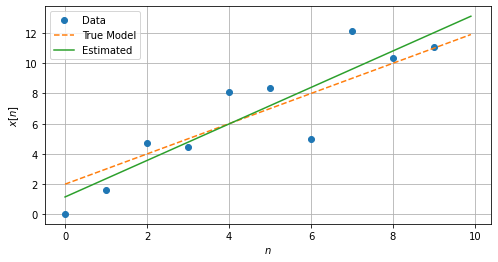

In [13]:
# Plotting the estimator
plt.figure(figsize=[8,4])
plt.plot(n,xn,'o')
plt.plot(n0,sn0,'--')
plt.plot(n0,sn_LS)
plt.grid('on')
plt.xlabel('$n$')
plt.ylabel('$x[n]$')
plt.legend(['Data','True Model','Estimated'])